In [1]:
def Nussinov(seq, pairs=None):
    n = len(seq)
    s = [[0] * n for _ in range(n)]
    trace = [[None] * n for _ in range(n)]

    # If no allowed pairs are given, assume canonical base pairing
    def pair_up(i, j):
        if pairs is None:
            return (seq[i] == 'A' and seq[j] == 'U') or \
                   (seq[i] == 'U' and seq[j] == 'A') or \
                   (seq[i] == 'G' and seq[j] == 'C') or \
                   (seq[i] == 'C' and seq[j] == 'G')
        else:
            return (i, j) in pairs

    # Fill the scoring matrix using the recurrence relation
    for length in range(1, n):
        for i in range(n - length):
            j = i + length

            # Case 1: s[i+1, j-1] + 1 if (i, j) ∈ Γ (allowed to pair)
            case1 = s[i + 1][j - 1] + 1 if pair_up(i, j) else float('-inf')
            case1_trace = (i + 1, j - 1) if case1 != float('-inf') else None

            # Case 2: s[i+1, j]
            case2 = s[i + 1][j]
            case2_trace = (i + 1, j)

            # Case 3: s[i, j-1]
            case3 = s[i][j - 1]
            case3_trace = (i, j - 1)

            # Case 4: max over all k
            case4 = float('-inf')
            case4_trace = None
            for k in range(i + 1, j):
                if s[i][k] + s[k + 1][j] > case4:
                    case4 = s[i][k] + s[k + 1][j]
                    case4_trace = (i, k, k + 1, j)

            # Take the maximum of all cases
            max_case = max(case1, case2, case3, case4)
            s[i][j] = max_case

            # Record the trace corresponding to the max case
            if max_case == case1:
                trace[i][j] = case1_trace
            elif max_case == case2:
                trace[i][j] = case2_trace
            elif max_case == case3:
                trace[i][j] = case3_trace
            elif max_case == case4:
                trace[i][j] = case4_trace

    # Traceback to collect all positions in the traceback path
    def collect_traceback(i, j):
        traceback = set()
        stack = [(i, j)]
        base_pairs = []
        while stack:
            i, j = stack.pop()
            traceback.add((i, j))
            if trace[i][j] == (i + 1, j - 1) and pair_up(i, j):
                base_pairs.append((i, j))
                stack.append((i + 1, j - 1))
            elif trace[i][j] == (i + 1, j):
                stack.append((i + 1, j))
            elif trace[i][j] == (i, j - 1):
                stack.append((i, j - 1))
            elif trace[i][j] and len(trace[i][j]) == 4:
                i1, k, k1, j1 = trace[i][j]
                stack.append((i, k))
                stack.append((k1, j))
        return traceback, base_pairs

    traceback, base_pairs = collect_traceback(0, n - 1)

    # Convert base pairs to dot-parenthesis structure
    structure = ['.'] * n
    for i, j in base_pairs:
        structure[i] = '('
        structure[j] = ')'

    # Print the scoring matrix with traceback highlighting
    def print_colored_matrix(matrix, traceback, color="93"):  # Default color yellow
        n = len(matrix)
        for i in range(n):
            row = []
            for j in range(n):
                value = matrix[i][j]
                if (i, j) in traceback:
                    row.append(f"\033[{color}m{value:3}\033[0m")
                else:
                    row.append(f"{value:3}")
            print(" ".join(row))

    return s, traceback, base_pairs, ''.join(structure), print_colored_matrix

# Example usage:
seq = "AUCGGCGCGGAUCAG"
s_matrix, traceback, base_pairs, structure, print_colored_matrix = Nussinov(seq)
print("Sequence:")
print(seq)
print("\nScoring Matrix:")
print_colored_matrix(s_matrix, traceback, "93")
print("\nDot-Parenthesis Structure:")
print(structure)
print("\nBase Pairs:")
print(base_pairs)

Sequence:
AUCGGCGCGGAUCAG

Scoring Matrix:
  0   1   1   2   2   3   3   4   4   4   4   5   6   6   6
  0   0   0   1   1   2   2   3   3   3   4   4   5   6   6
  0   0   0   1   1   2   2   3   3   3   3   4   5   5   5
  0   0   0   0   0   1   1   2   2   2   2   3   4   4   4
  0   0   0   0   0   1   1   2   2   2   2   3   4   4   4
  0   0   0   0   0   0   1   1   2   2   2   3   4   4   4
  0   0   0   0   0   0   0   1   1   1   1   2   3   3   3
  0   0   0   0   0   0   0   0   1   1   1   2   3   3   3
  0   0   0   0   0   0   0   0   0   0   0   1   2   2   2
  0   0   0   0   0   0   0   0   0   0   0   1   2   2   2
  0   0   0   0   0   0   0   0   0   0   0   1   1   1   2
  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

Dot-Parenthesis Structure:
.(()(()().())).

Base Pairs:


In [2]:
def basic_cases():
    # basic cases
    test_cases = [
        {
            "seq": "AUAU",
            "expected_pairs": [(0, 3), (1, 2)],
            "expected_structure": "(())",
        },
        {
            "seq": "GCGC",
            "expected_pairs": [(0, 3), (1, 2)],
            "expected_structure": "(())",
        },
        {
            "seq": "GGGG",
            "expected_pairs": [],
            "expected_structure": "....",
        },
    ]

    for idx, case in enumerate(test_cases):
        try:
            seq = case["seq"]
            expected_pairs = case["expected_pairs"]
            expected_structure = case["expected_structure"]

            s_matrix, traceback, base_pairs, structure, _ = Nussinov(seq)

            print(f"Test Case {idx + 1}: Sequence: {seq}")
            print(f"Expected Pairs: {expected_pairs}, Computed Pairs: {base_pairs}")
            print(f"Expected Structure: {expected_structure}, Computed Structure: {structure}")
            
            assert set(base_pairs) == set(expected_pairs), "Base pairs do not match expected results"
            assert structure == expected_structure, "Dot-parenthesis structure does not match expected results"
            print("Test passed\n")
        except AssertionError as e:
            print(f"Test Case {idx + 1} failed: {e}\n")
        except Exception as e:
            print(f"Test Case {idx + 1} encountered an error: {e}\n")

basic_cases()

Test Case 1: Sequence: AUAU
Expected Pairs: [(0, 3), (1, 2)], Computed Pairs: [(0, 3), (1, 2)]
Expected Structure: (()), Computed Structure: (())
Test passed

Test Case 2: Sequence: GCGC
Expected Pairs: [(0, 3), (1, 2)], Computed Pairs: [(0, 3), (1, 2)]
Expected Structure: (()), Computed Structure: (())
Test passed

Test Case 3: Sequence: GGGG
Expected Pairs: [], Computed Pairs: []
Expected Structure: ...., Computed Structure: ....
Test passed



    Sequence Length  Average Running Time (s)
0                10                  0.000056
1                20                  0.000164
2                30                  0.000419
3                40                  0.000832
4                50                  0.001427
5                60                  0.002255
6                70                  0.003373
7                80                  0.004913
8                90                  0.009020
9               100                  0.008940
10              110                  0.011377
11              120                  0.014756
12              130                  0.018213
13              140                  0.022149
14              150                  0.026409
15              160                  0.033402
16              170                  0.037060
17              180                  0.043676
18              190                  0.050618
19              200                  0.060552
20              210               

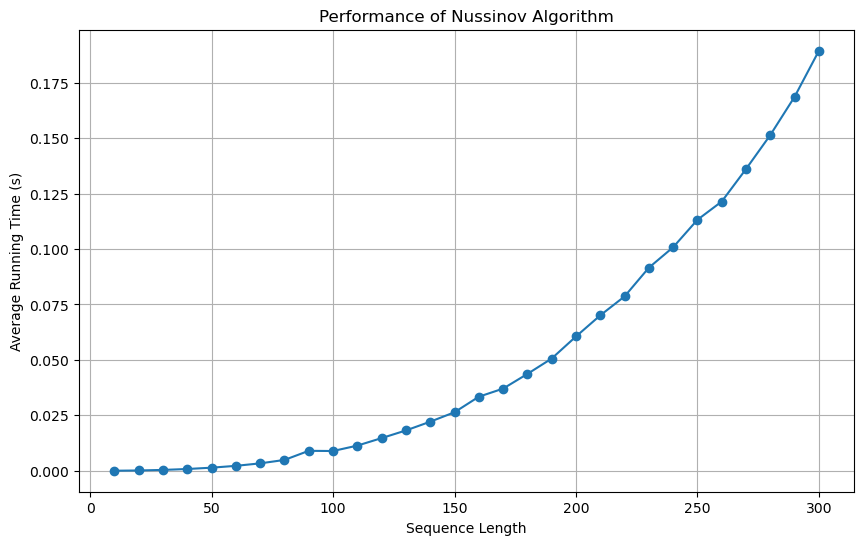

In [3]:
#Performance Test
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

def generate_random_sequence(length):
    return ''.join(random.choices("ACGU", k=length))

def test_nussinov_performance(nussinov_func, lengths, num_trials=10):
    results = []
    for length in lengths:
        total_time = 0
        for _ in range(num_trials):
            seq = generate_random_sequence(length)
            start_time = time.time()
            nussinov_func(seq)
            elapsed_time = time.time() - start_time
            total_time += elapsed_time
        average_time = total_time / num_trials
        results.append({"Sequence Length": length, "Average Running Time (s)": average_time})
    return pd.DataFrame(results)

sequence_lengths = list(range(10, 301, 10))
performance_data = test_nussinov_performance(Nussinov, sequence_lengths)

performance_data.to_csv("nussinov_performance.csv", index=False)
print(performance_data)

plt.figure(figsize=(10, 6))
plt.plot(
    performance_data["Sequence Length"],
    performance_data["Average Running Time (s)"],
    marker="o",
    linestyle="-"
)
plt.title("Performance of Nussinov Algorithm")
plt.xlabel("Sequence Length")
plt.ylabel("Average Running Time (s)")
plt.grid(True)
plt.show()